<a href="https://colab.research.google.com/github/chrstn-kyo/Adversarial-attacks-and-defence/blob/main/Numerical_gradient_checking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def G(V, W, X, Y):

    T_0 = np.tanh((W).dot(X))
    T_1 = ((V).dot(T_0) - Y)
    functionValue = (np.linalg.norm(T_1, 'fro') ** 2)
    return functionValue

In [ ]:
def deltaV(V, W, X, Y):

    T_0 = np.tanh((W).dot(X))
    T_1 = ((V).dot(T_0) - Y)
    gradient = (2 * (T_1).dot(T_0.T))
    return gradient

In [ ]:
def deltaW(V, W, X, Y):

    T_0 = np.tanh((W).dot(X))
    T_1 = ((V).dot(T_0) - Y)

    functionValue = (np.linalg.norm(T_1, 'fro') ** 2)
    gradient = (2 * (((V.T).dot(T_1) * (np.ones((W.shape[0], X.shape[1])) - (T_0 ** 2)))).dot(X.T))
    return gradient

In [ ]:
def deltaFDV(V, W, X, Y):

    t = 1E-6
    e = np.zeros((2,2))
    result = np.zeros((2,2))

    for i in range(2):
        for j in range(2):
            e[i][j] = 1
            result[i][j] = (G(V + t * e, W, X, Y) - G(V, W, X, Y)) / t
            e[i][j] = 0
    return result

In [ ]:
def deltaFDW(V, W, X, Y):

    t = 1E-6
    e = np.zeros((2,2))
    result = np.zeros((2,2))

    for i in range(2):
        for j in range(2):
            e[i][j] = 1
            result[i][j] = (G(V, W + t * e, X, Y) - G(V, W, X, Y)) / t
            e[i][j] = 0
    return result

In [ ]:
def checkGradient(V, W, X, Y):


    print('approximation error on gradient wrt V :',
          np.linalg.norm(deltaFDV(V, W, X, Y) - deltaV(V, W, X, Y)))
    print('approximation error on gradient wrt W :',
          np.linalg.norm(deltaFDV(V, W, X, Y) - deltaV(V, W, X, Y)))



In [ ]:
def generateRandomData():

    V = np.random.randn(2, 2)
    W = np.random.randn(2, 2)
    X = np.random.randn(2, 2)
    Y = np.random.randn(2, 2)

    return V, W, X, Y

V, W, X, Y = generateRandomData()

print('functionValue = ', G(V, W, X, Y))
print('gradient wrt V = ', deltaV(V, W, X, Y))
print('gradient wrt W = ', deltaW(V, W, X, Y))
print('numerical gradient wrt V = ', deltaFDV(V, W, X, Y))
print('numerical gradient wrt W = ', deltaFDW(V, W, X, Y))
print('numerical gradient checking ...')
checkGradient(V, W, X, Y)

functionValue =  1.1146795436187327
gradient wrt V =  [[-0.09547643  2.31512965]
 [ 0.2024836  -1.49677966]]
gradient wrt W =  [[-0.04340734  0.02317401]
 [ 0.01192399 -0.00494851]]
numerical gradient wrt V =  [[-0.09547622  2.31513142]
 [ 0.20248381 -1.49677789]]
numerical gradient wrt W =  [[-0.04340733  0.02317401]
 [ 0.01192401 -0.00494851]]
numerical gradient checking ...
approximation error on gradient wrt V : 2.514427075038876e-06
approximation error on gradient wrt W : 2.514427075038876e-06


In [ ]:
def naivegradientdescent(V, W, X, Y, niter = 100, alpha = 0.001):
    E = np.zeros((niter,1))

    for i in range(niter):
        E[i] = G(V, W, X, Y)
        V = V - alpha*deltaV(V, W, X, Y)
        W = W - alpha*deltaW(V, W, X, Y)

    plt.plot(E)
    plt.axis('tight')
    plt.

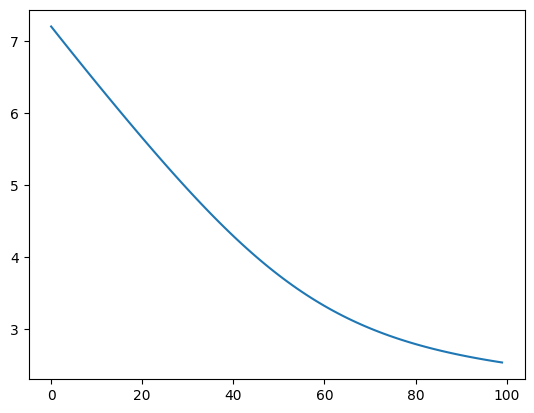

In [ ]:
V, W, X, Y = generateRandomData()

naivegradientdescent(V, W, X, Y)

In [ ]:
def alternatinggradient(V, W, X, Y, niter = 100, alpha = 0.001, beta = 0.002):
    E = np.zeros((niter,1))

    for i in range(niter):
        E[i] = G(V, W, X, Y)
        V1 = V - alpha*deltaV(V, W, X, Y)
        W = W - beta*deltaW(V1, W, X, Y)
        V = V1

    plt.plot(E)
    plt.axis('tight')

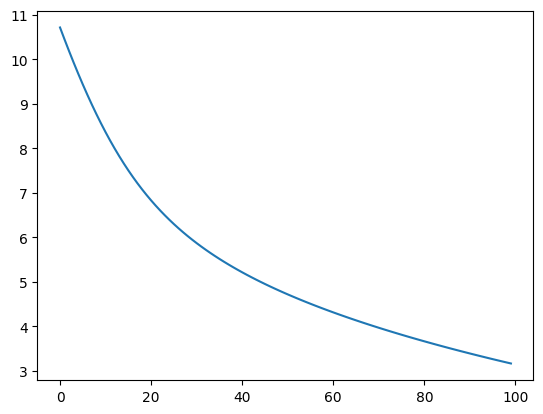

In [ ]:
V, W, X, Y = generateRandomData()

alternatinggradient(V, W, X, Y)

In [ ]:
def variableprojection(V, W, X, Y, beta = 0.001, niter = 100):

    E = np.zeros((niter,1))

    for i in range(niter):
        E[i] = G(V, W, X, Y)
        # V1 = argmin(G(V,W, X, Y))
        W = W - beta*deltaW(V, W, X, Y)
        V = V1

    plt.plot(E)
    plt.axis('tight')